In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time

In [3]:
# Decorador per mesurar el temps d'execució. S'utilitza posant @time_it a sobre de la funció.
def time_it(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()  
        result = func(*args, **kwargs)  
        end_time = time.time()  
        execution_time = end_time - start_time 
        print(f"Temps d'execució de la funció {func.__name__}: {execution_time:.4f} segons")
        return result  
    return wrapper

In [4]:
file = "dataset.csv"
dataset = pd.read_csv(file)
print(dataset.head())

   id  age  year  sex  glang  part  job  stud_h  health  psyt  jspe  qcae_cog  \
0   2   18     1    1    120     1    0      56       3     0    88        62   
1   4   26     4    1      1     1    0      20       4     0   109        55   
2   9   21     3    2      1     0    0      36       3     0   106        64   
3  10   21     2    2      1     0    1      51       5     0   101        52   
4  13   21     3    1      1     1    0      22       4     0   102        58   

   qcae_aff  amsp  erec_mean  cesd  stai_t  mbi_ex  mbi_cy  mbi_ea  
0        27    17   0.738095    34      61      17      13      20  
1        37    22   0.690476     7      33      14      11      26  
2        39    17   0.690476    25      73      24       7      23  
3        33    18   0.833333    17      48      16      10      21  
4        28    21   0.690476    14      46      22      14      23  


Eliminem la columna de id ja que no té cap rellevància en la qüestió. També treiem la columna amsp ja que no entenem que representa. 

In [5]:
df = dataset.drop(['id', 'amsp'], axis=1)
# df = dataset.drop(['id', 'amsp', 'cesd',  'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea'], axis=1)

Separem entre variables numèriques, categòriques i treiem les columnes de cesd (depressió), stai_t (ansietat), 

In [6]:
df_cat = df[['sex', 'year', 'glang', 'part', 'job', 'stud_h', 'health', 'psyt']]
df_num = df[['age', 'jspe', 'qcae_cog', 'qcae_aff', 'erec_mean', 'cesd', 'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea']]
# df_cat = df[['sex', 'year', 'glang', 'part', 'job', 'stud_h', 'health', 'psyt']]
# df_num = df[['age', 'jspe', 'qcae_cog', 'qcae_aff', 'erec_mean']]

vars_categoriques = ['sex', 'year', 'glang', 'part', 'job', 'stud_h', 'health', 'psyt']
vars_num = ['age', 'jspe', 'qcae_cog', 'qcae_aff', 'erec_mean', 'cesd', 'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea']

# Detecció de Biaix

In [7]:
# Determine grid size
def df_dis(df):
    num_cols = len(df.columns)
    num_rows = math.ceil(num_cols / 4)  # Adjust columns per row as needed

    fig, axes = plt.subplots(num_rows, 4, figsize=(15, num_rows * 5))  # 3 columns per row
    axes = axes.flatten()

    # Loop through each column and plot on a specific subplot
    for i, column in enumerate(df.columns):
        ax = axes[i]
        if df[column].dtype == 'object':
            sns.countplot(x=column, data=df, ax=ax, palette="Set2")
            ax.set_title(f'Distribution of {column}')
            ax.tick_params(axis='x', rotation=45)
        else:
            sns.histplot(df[column], kde=True, ax=ax, color="skyblue")
            ax.set_title(f'Distribution of {column}')
            
    # Hide any unused subplots
    for i in range(num_cols, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

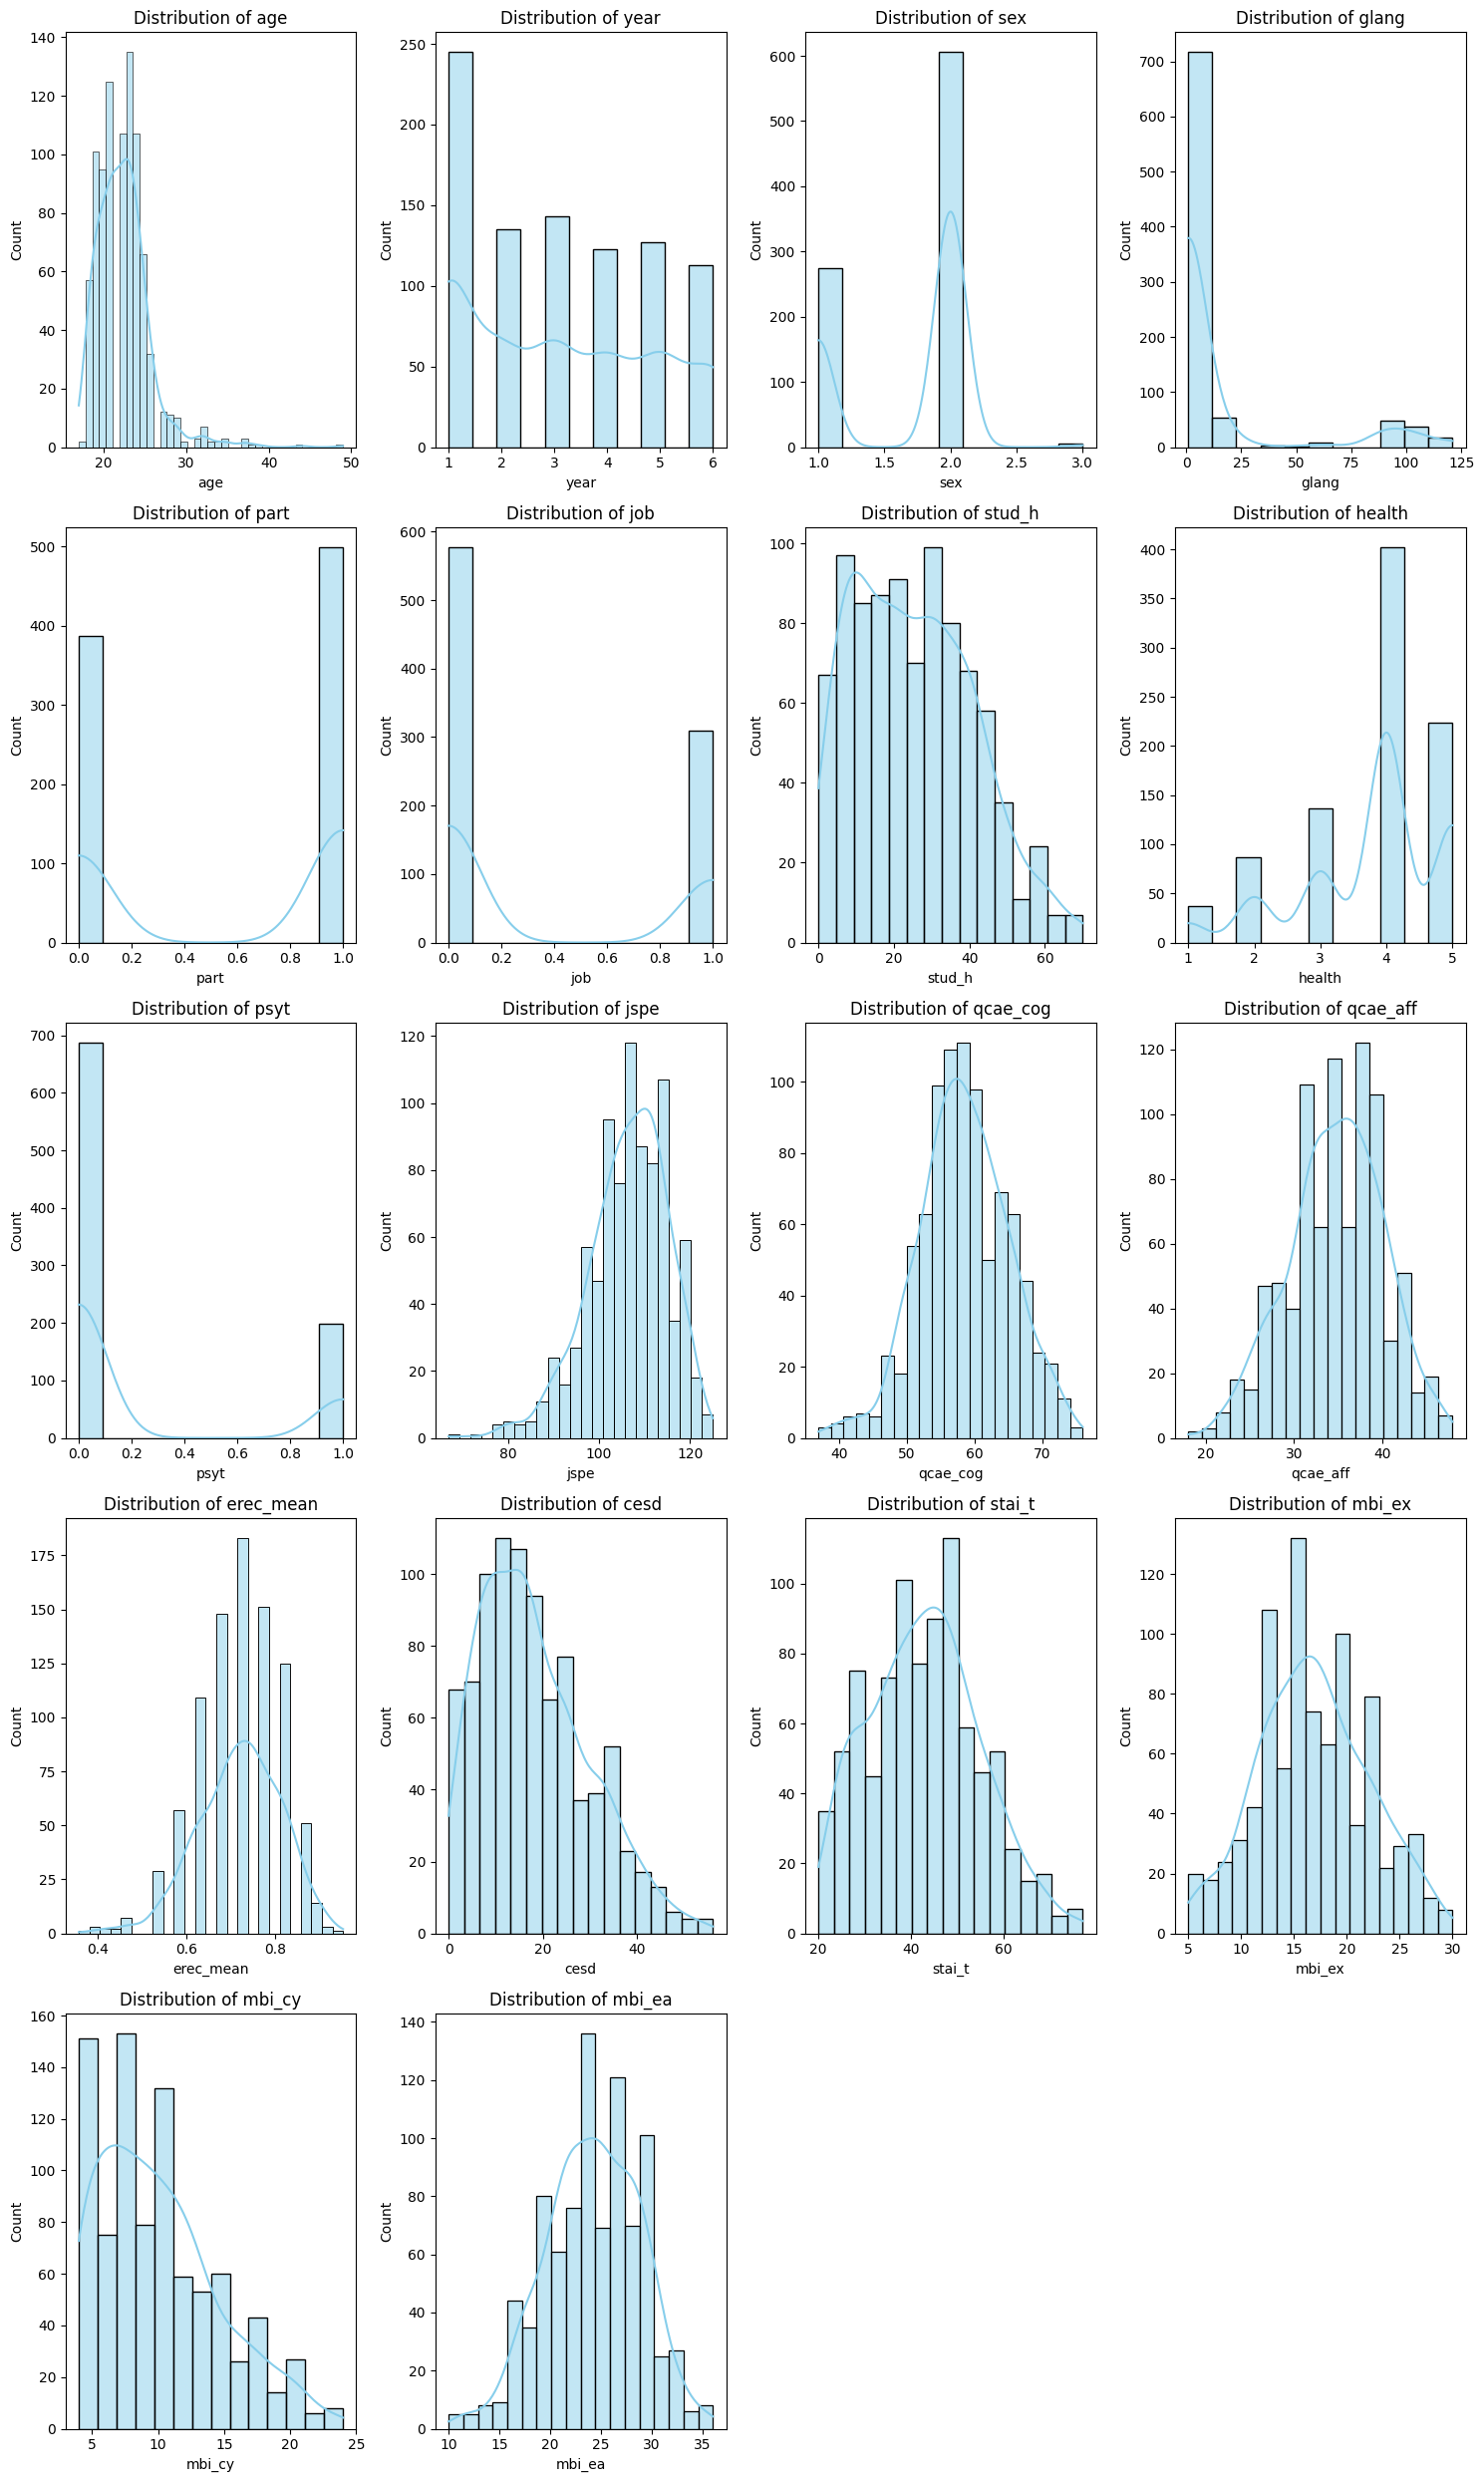

In [8]:
df_dis(df)

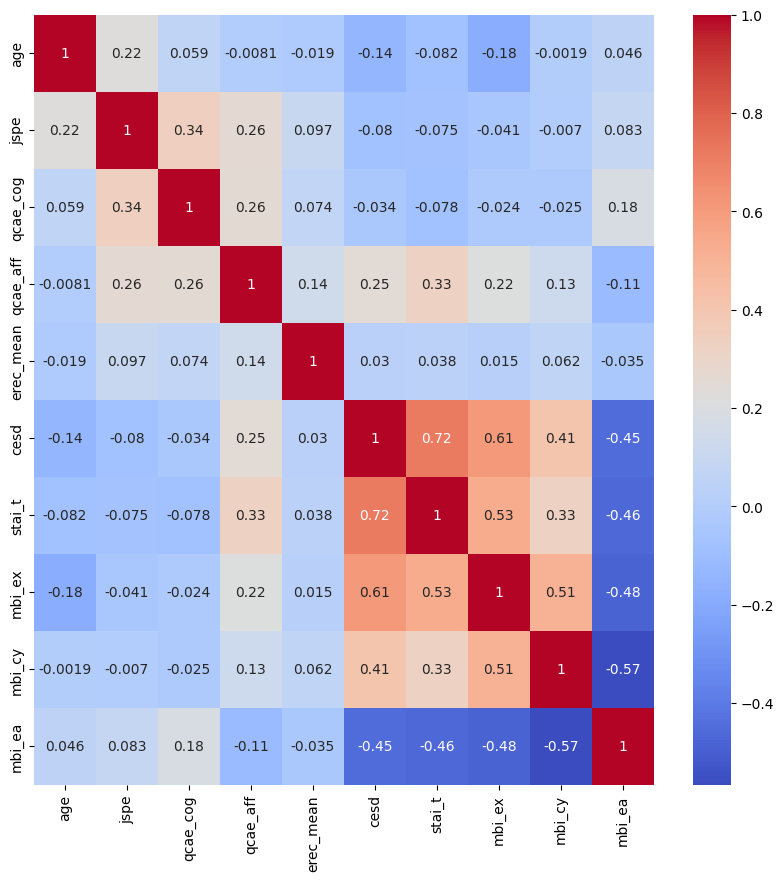

In [9]:
corr_matrix = df_num.corr(method='pearson')
corr_matrix
# Cell ends here

# Cell starts here
# Heatmap of the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Després de veure les distribucions i correlacions podem dir que si que hi ha biaix i que també necessitem normalitzar les dades, ja que hi ha diferents rangs entre les dades.

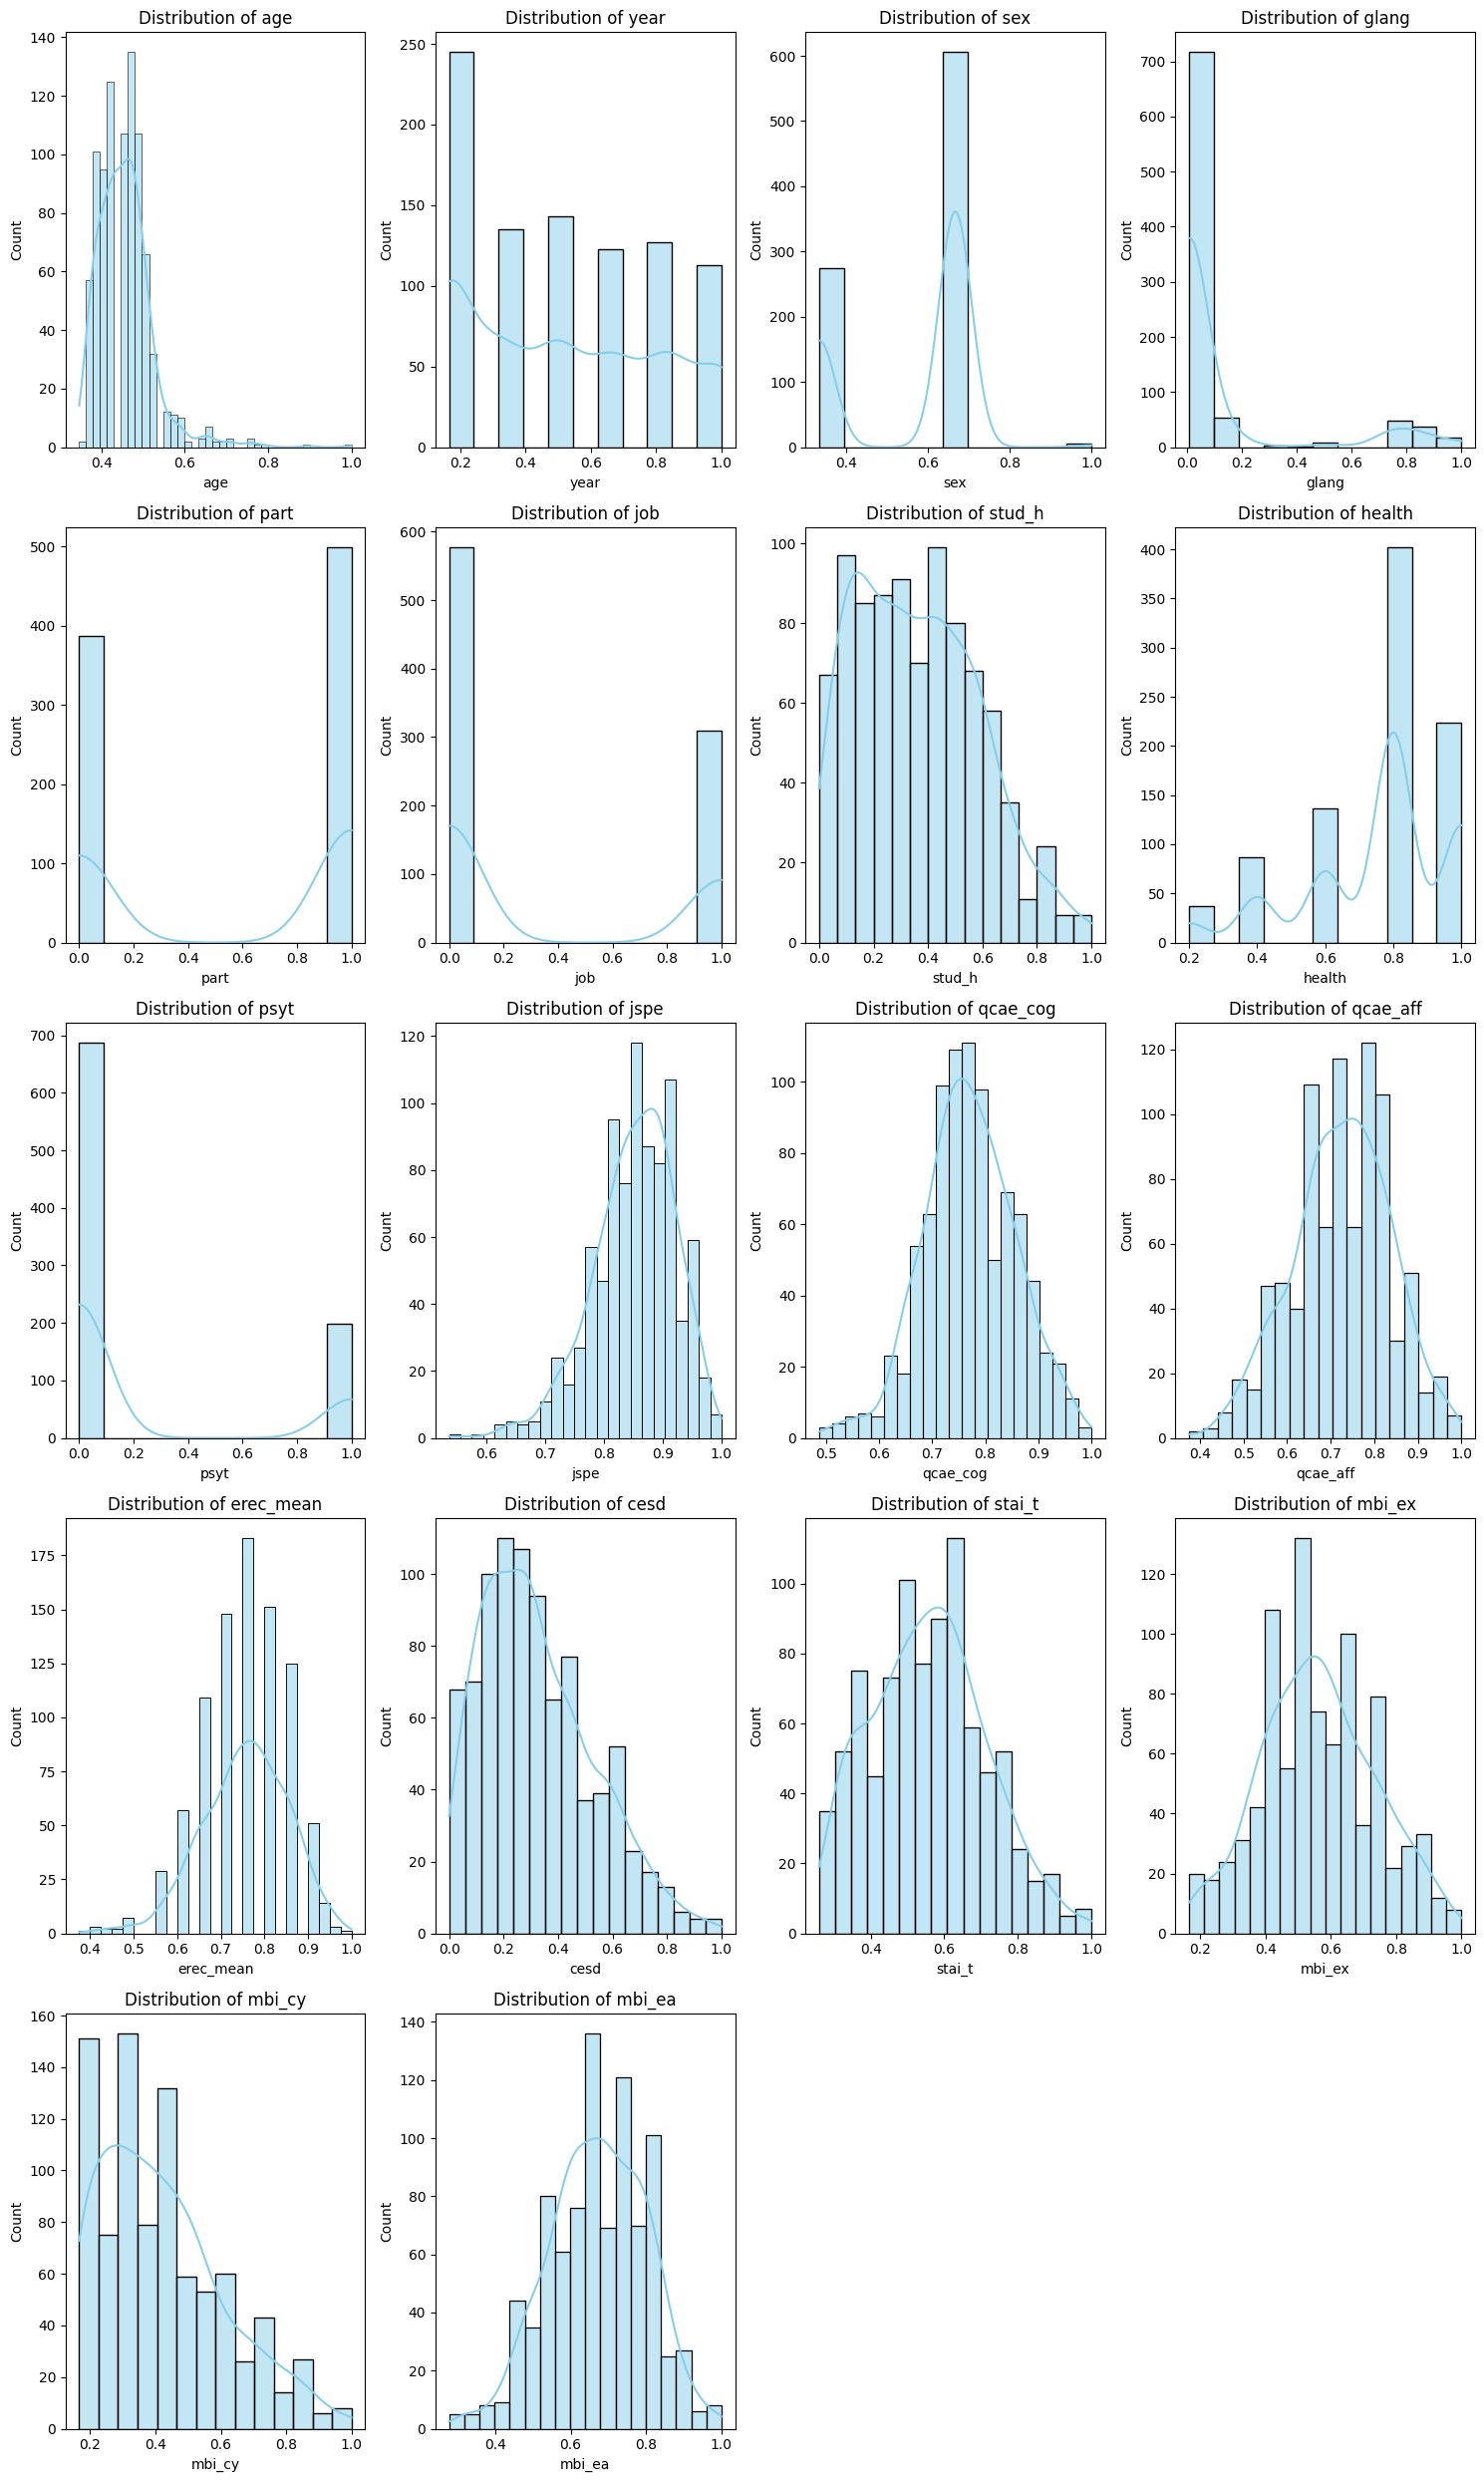

In [10]:
df_max_scaled = df.copy() 
  
# apply normalization techniques 
for column in df_max_scaled.columns: 
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max() 

df_dis(df_max_scaled)

## Min Max scaled

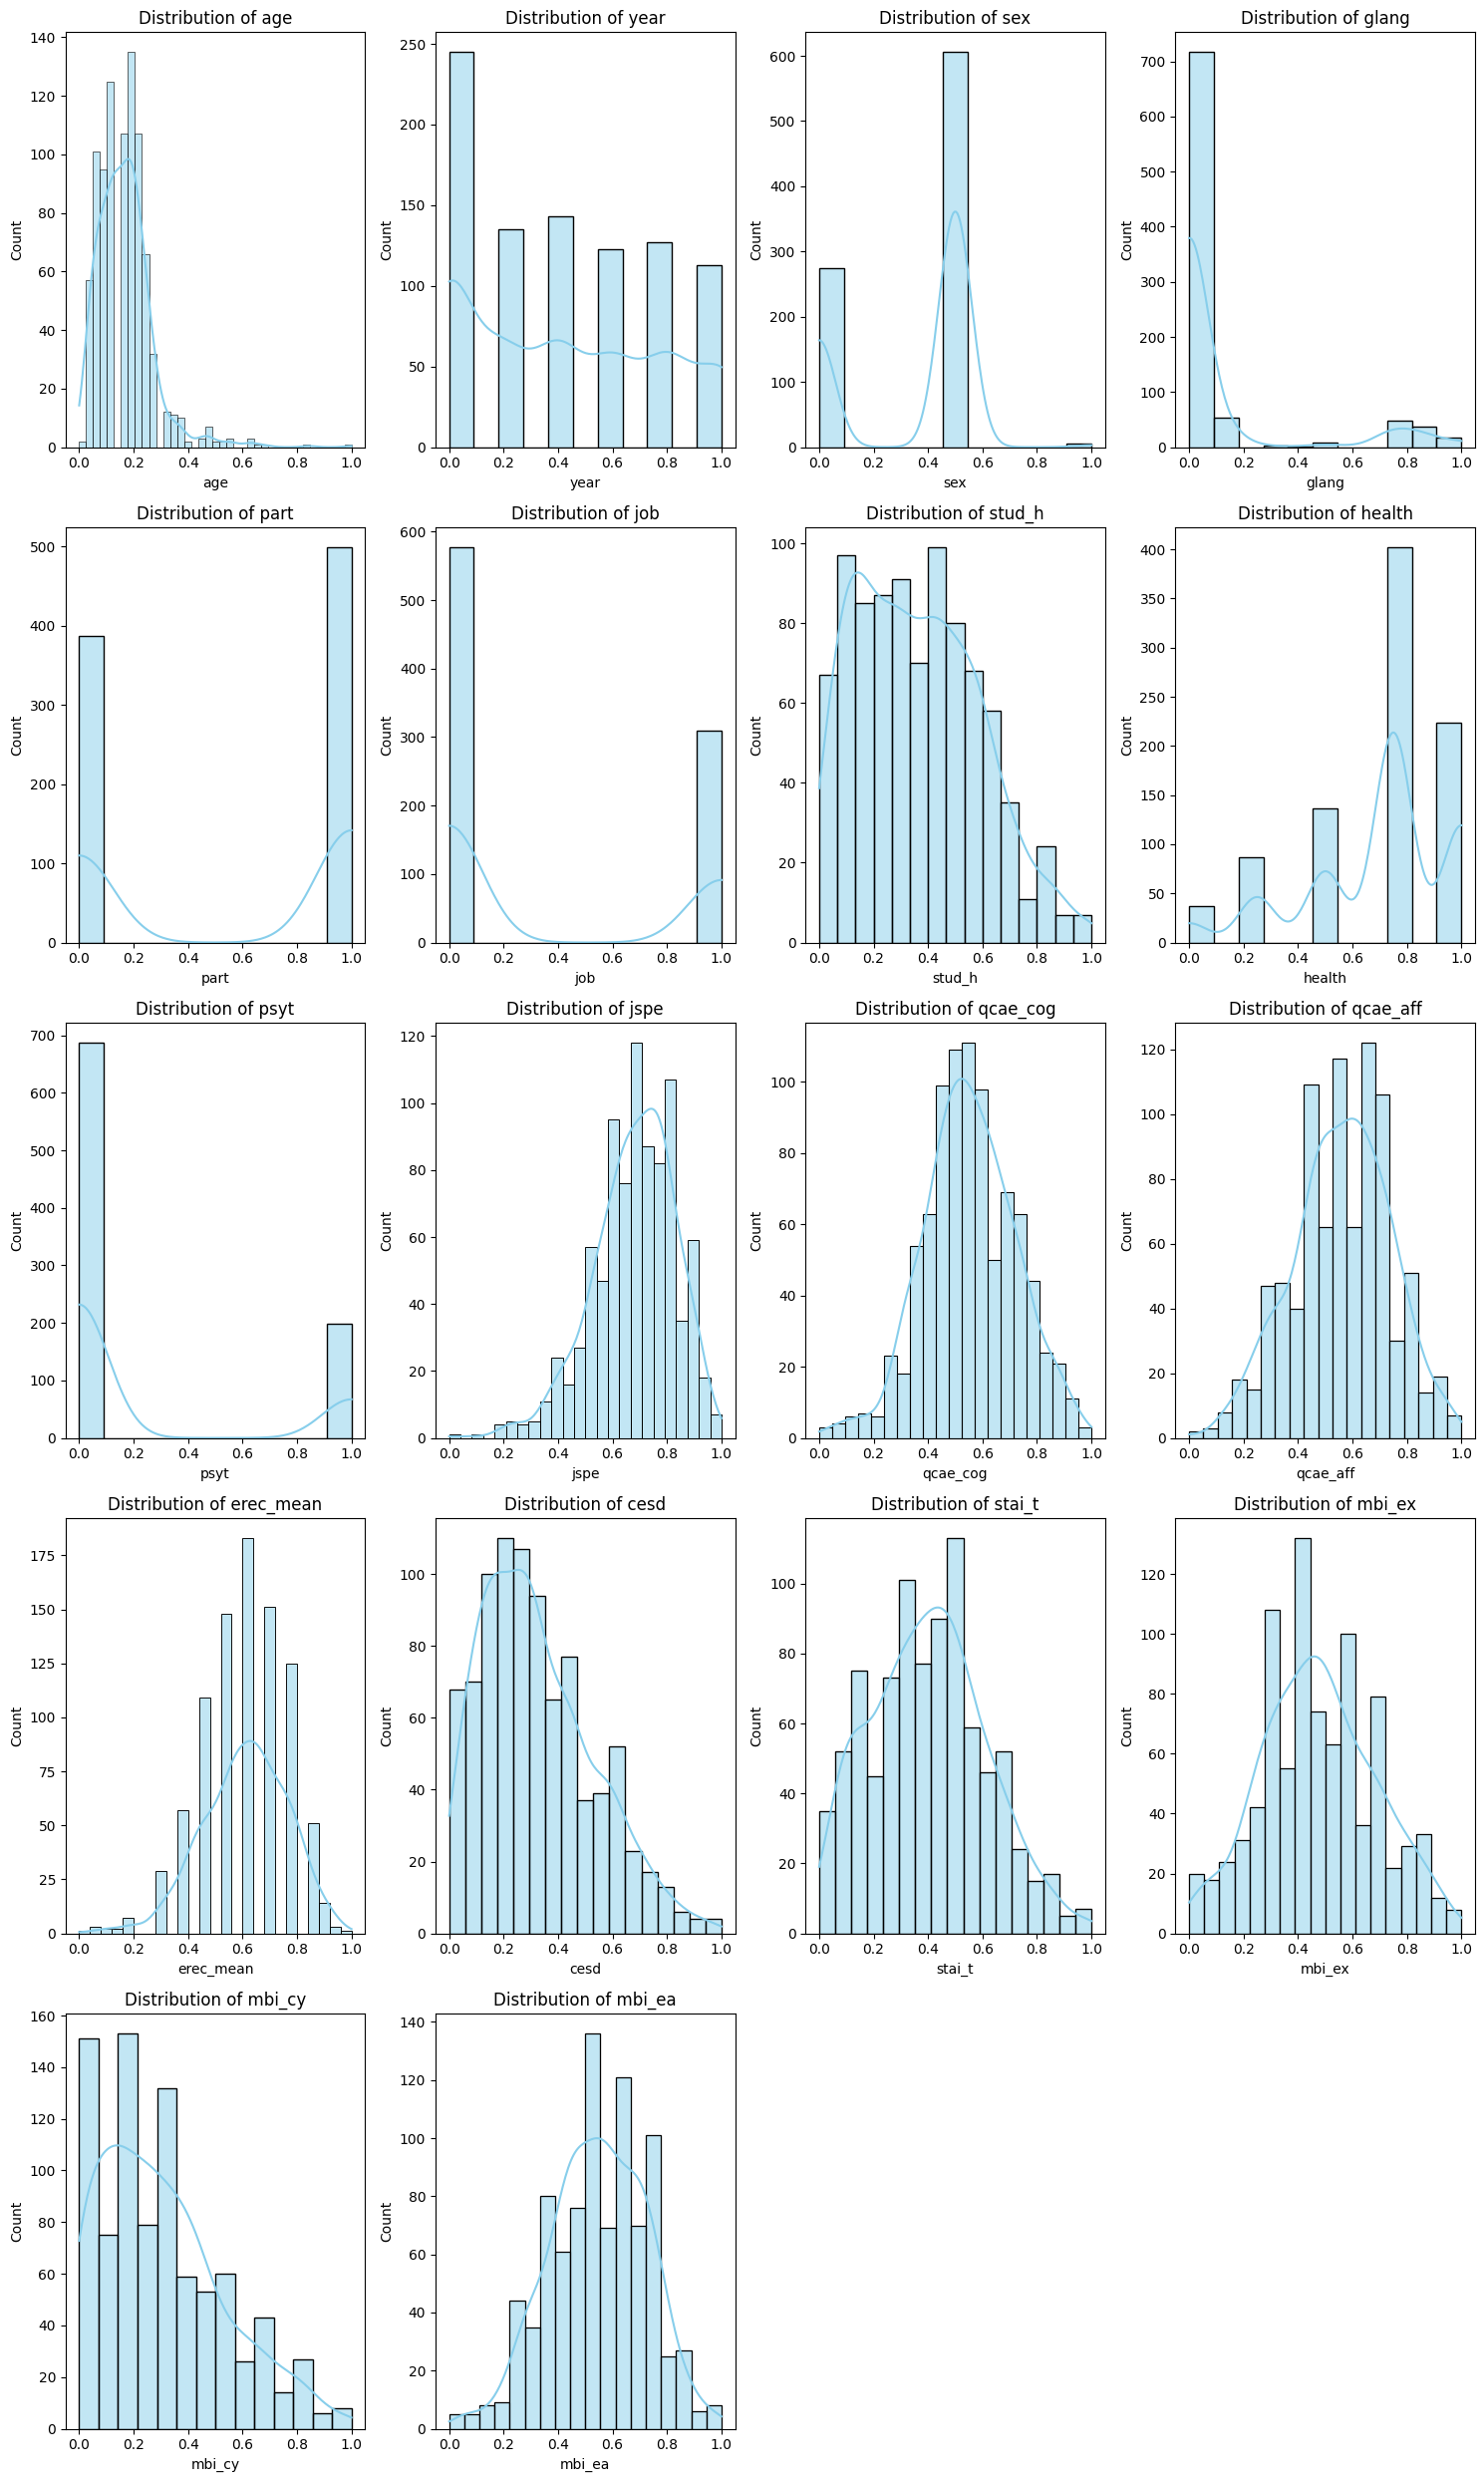

In [11]:
df_min_max_scaled = df.copy() 
  
# apply normalization techniques 
for column in df_min_max_scaled.columns: 
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())     
  
# view normalized data 
df_dis(df_min_max_scaled)

In [12]:
df_default = df.copy()
df_default.head()

,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,18,1,1,120,1,0,56,3,0,88,62,27,0.738095,34,61,17,13,20
1,26,4,1,1,1,0,20,4,0,109,55,37,0.690476,7,33,14,11,26
2,21,3,2,1,0,0,36,3,0,106,64,39,0.690476,25,73,24,7,23
3,21,2,2,1,0,1,51,5,0,101,52,33,0.833333,17,48,16,10,21
4,21,3,1,1,1,0,22,4,0,102,58,28,0.690476,14,46,22,14,23


In [13]:
df_max_scaled.head()

,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,0.367347,0.166667,0.333333,0.991736,1.0,0.0,0.800000,0.6,0.0,0.704,0.815789,0.562500,0.775,0.607143,0.792208,0.566667,0.541667,0.555556
1,0.530612,0.666667,0.333333,0.008264,1.0,0.0,0.285714,0.8,0.0,0.872,0.723684,0.770833,0.725,0.125000,0.428571,0.466667,0.458333,0.722222
2,0.428571,0.500000,0.666667,0.008264,0.0,0.0,0.514286,0.6,0.0,0.848,0.842105,0.812500,0.725,0.446429,0.948052,0.800000,0.291667,0.638889
3,0.428571,0.333333,0.666667,0.008264,0.0,1.0,0.728571,1.0,0.0,0.808,0.684211,0.687500,0.875,0.303571,0.623377,0.533333,0.416667,0.583333
4,0.428571,0.500000,0.333333,0.008264,1.0,0.0,0.314286,0.8,0.0,0.816,0.763158,0.583333,0.725,0.250000,0.597403,0.733333,0.583333,0.638889


In [14]:
df_min_max_scaled.head()

,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,0.03125,0.0,0.0,0.991667,1.0,0.0,0.800000,0.50,0.0,0.362069,0.641026,0.300000,0.64,0.607143,0.719298,0.48,0.45,0.384615
1,0.28125,0.6,0.0,0.000000,1.0,0.0,0.285714,0.75,0.0,0.724138,0.461538,0.633333,0.56,0.125000,0.228070,0.36,0.35,0.615385
2,0.12500,0.4,0.5,0.000000,0.0,0.0,0.514286,0.50,0.0,0.672414,0.692308,0.700000,0.56,0.446429,0.929825,0.76,0.15,0.500000
3,0.12500,0.2,0.5,0.000000,0.0,1.0,0.728571,1.00,0.0,0.586207,0.384615,0.500000,0.80,0.303571,0.491228,0.44,0.30,0.423077
4,0.12500,0.4,0.0,0.000000,1.0,0.0,0.314286,0.75,0.0,0.603448,0.538462,0.333333,0.56,0.250000,0.456140,0.68,0.50,0.500000


# Mesures de Rendiment

c:\Users\joanc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\joanc\AppData\Local\Temp\ipykernel_10880\3148494639.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='red', marker='X', label='Cluster Centers', cmap='viridis')


Influència de cada component en el PCA:
                  0         1
age       -0.145671 -0.394639
year      -0.180338 -0.478366
sex        0.161393 -0.151902
glang      0.047950  0.115301
part      -0.075557 -0.177209
job       -0.061488 -0.240791
stud_h     0.125929  0.381895
health    -0.236144  0.057440
psyt       0.183672 -0.150490
jspe      -0.064751 -0.361675
qcae_cog  -0.038832 -0.207251
qcae_aff   0.181906 -0.263199
erec_mean  0.032724 -0.152282
cesd       0.445297 -0.021111
stai_t     0.425035 -0.059177
mbi_ex     0.415361 -0.014007
mbi_cy     0.308316 -0.176660
mbi_ea    -0.341578  0.127696


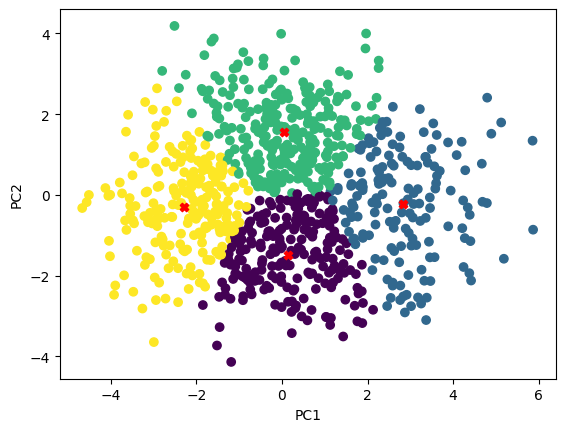

Temps d'execució de la funció kmeans_pca: 0.2570 segons


In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

@time_it
def kmeans_pca(df):
    scaler = StandardScaler()
    df_num_scaled = scaler.fit_transform(df)
    # df_num_scaled = df.copy()

    pca = PCA(n_components=2)
    pca.fit(df_num_scaled)
    pca_features = pca.transform(df_num_scaled)

    model = KMeans(n_clusters=4)
    clusters = model.fit_predict(pca_features)
    cluster_centers_pca = model.cluster_centers_

    loadings = pca.components_
    loadings_df = pd.DataFrame(loadings.T, index=df.columns)
    print("Influència de cada component en el PCA:")
    print(loadings_df)


    plt.scatter(pca_features[:,0], pca_features[:,1], c=clusters, cmap='viridis')
    plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='red', marker='X', label='Cluster Centers', cmap='viridis')

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()


# kmeans_pca(df)
kmeans_pca(df_max_scaled)
# kmeans_pca(df)

In [16]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# df_ex = df.copy()
# df_ex = df_min_max_scaled.copy()
df_ex = df_max_scaled.copy()

@time_it
def kmeans_tsne(df, k):
    scaler = StandardScaler()
    df_num_scaled = scaler.fit_transform(df)

    tsne = TSNE(n_components=2)
    tsne_features = tsne.fit_transform(df_num_scaled)

    model = KMeans(n_clusters=k)
    clusters = model.fit_predict(tsne_features)
    cluster_centers_tsne = model.cluster_centers_

    plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=clusters, cmap='viridis')
    plt.scatter(cluster_centers_tsne[:, 0], cluster_centers_tsne[:, 1], c='red', marker='X', label='Cluster Centers', cmap='viridis')

    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.legend()
    plt.show()


c:\Users\joanc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\joanc\AppData\Local\Temp\ipykernel_10880\119920050.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_centers_tsne[:, 0], cluster_centers_tsne[:, 1], c='red', marker='X', label='Cluster Centers', cmap='viridis')


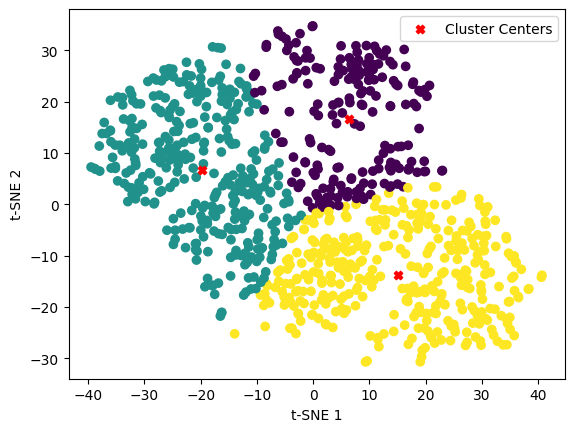

Temps d'execució de la funció kmeans_tsne: 2.4500 segons


In [17]:
# df_ex = df.copy()
# df_ex = df_min_max_scaled.copy()
df_ex = df_max_scaled.copy()

# kmeans_pca(df)
kmeans_tsne(df, 3)

LABELS: [0 1 2 0 1 1 2 1 2 2 1 2 0 2 2 1 0 1 0 2 2 1 2 2 2 0 2 0 2 2 0 2 2 1 0 1 0
 2 2 2 0 0 0 1 0 1 2 1 0 2 2 1 1 1 2 1 0 2 1 2 1 2 1 2 1 1 0 2 2 2 1 2 1 1
 0 1 1 0 0 1 0 1 2 2 2 2 0 0 1 2 0 1 2 2 0 0 1 1 0 0 1 1 2 2 1 0 0 2 1 0 1
 1 0 0 2 1 2 2 1 2 1 2 0 2 0 0 0 2 2 2 1 1 2 0 0 2 2 1 1 0 0 2 2 2 2 2 1 2
 2 0 1 2 1 2 2 1 2 2 2 2 1 0 2 2 0 0 1 0 2 0 2 1 0 0 2 2 1 1 0 1 2 0 2 1 1
 0 2 1 1 0 2 2 0 0 1 1 1 0 1 2 1 0 2 0 1 2 1 1 2 1 0 1 1 0 2 2 0 1 2 0 0 0
 2 1 2 2 0 1 0 2 1 2 1 2 1 2 0 1 0 1 2 1 1 0 2 0 1 0 1 2 2 2 2 1 1 1 0 2 1
 2 2 2 1 2 1 2 2 1 2 2 2 1 1 1 1 0 2 2 0 1 2 2 2 0 0 1 1 0 2 1 0 2 0 0 0 0
 0 2 2 1 1 0 2 2 1 2 1 1 1 1 0 0 1 1 2 0 2 0 0 1 0 2 2 2 1 0 0 2 0 1 0 0 0
 1 0 1 0 0 0 0 2 1 1 2 1 0 1 0 1 1 2 1 2 2 1 2 2 0 1 0 1 1 2 0 2 1 0 2 1 1
 0 1 1 2 0 0 2 0 2 2 1 1 2 0 0 1 1 1 1 2 1 2 1 0 0 2 1 1 0 1 0 1 0 0 2 2 1
 1 2 1 1 1 0 2 0 2 2 1 1 0 2 1 1 1 2 2 0 2 2 0 2 2 0 0 1 2 0 1 2 1 2 0 1 2
 0 1 2 0 2 1 0 2 2 1 2 0 1 2 2 1 2 0 1 2 0 1 2 2 1 1 1 1 1 0 2 1 1 0 1 2 0
 1 2 2 0 2 2 1 1 

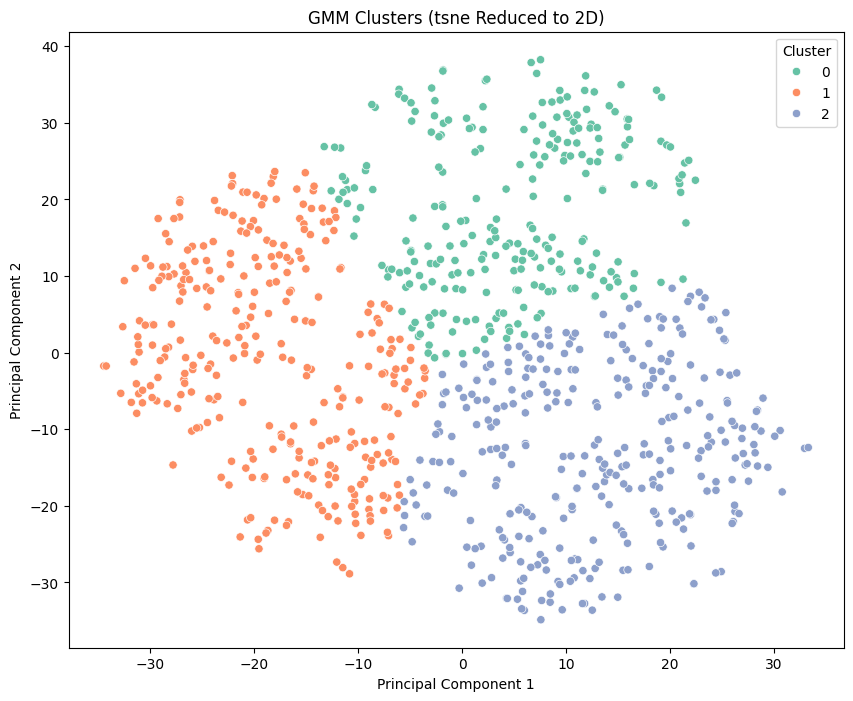

In [18]:
from sklearn.mixture import GaussianMixture

n_clusters = 3

df_c = df_max_scaled.copy()

scaler = StandardScaler()
df_num_scaled = scaler.fit_transform(df_c)

tsne = TSNE(n_components=2)
tsne_features = tsne.fit_transform(df_num_scaled)

gmm = GaussianMixture(n_components=3, covariance_type='full').fit(tsne_features)
labels = gmm.predict(tsne_features)
df_c['GMM_Cluster'] = labels
print("LABELS:", labels)
print(f"GMM clustering completed with {n_clusters} components.")

# plot

# pca = PCA(n_components=2)
# components = pca.fit_transform(df_c)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_features[:, 0], y=tsne_features[:, 1], hue=df_c['GMM_Cluster'], palette='Set2')
plt.title('GMM Clusters (tsne Reduced to 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster")
plt.show()


Evaluant: sex
Evaluant: year
Evaluant: glang
Evaluant: part
Evaluant: job
Evaluant: stud_h
Evaluant: health
Evaluant: psyt


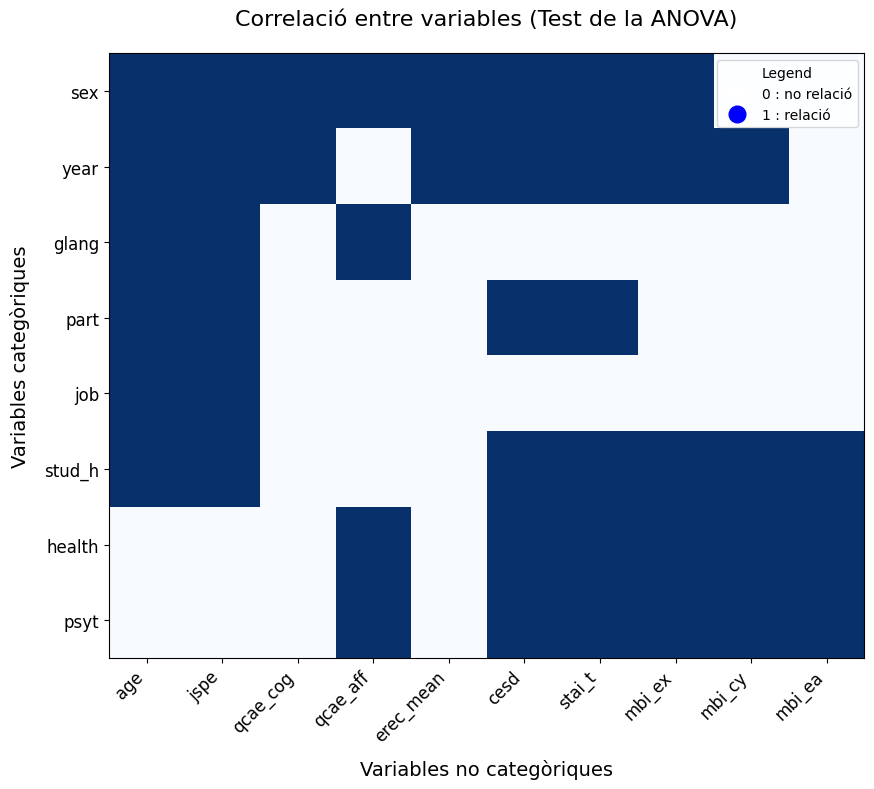

In [ ]:
from scipy.stats import f_oneway

df_t = df.copy()
M = np.zeros(shape=(len(vars_categoriques), len(vars_num)))
for i, Vcat in enumerate(vars_categoriques):
    groups = [[group[var].values for _, group in df_t.groupby(Vcat)] for var in vars_num]
    # print("Evaluant:", Vcat)
    for j, g in enumerate(groups):
        f_stat, p_value = f_oneway(*g)
        # print(f"{vars_num[j]} : ANOVA F-statistic: {f_stat}, p-value: {p_value}")
        M[i][j] = p_value < 0.05


plt.figure(figsize=(10, 8))
plt.imshow(M, cmap='Blues', interpolation='none')

plt.xticks(np.arange(len(vars_num)), vars_num, rotation=45, ha='right', fontsize=12)
plt.yticks(np.arange(len(vars_categoriques)), vars_categoriques, fontsize=12)

plt.xlabel("Variables no categòriques", fontsize=14, labelpad=10)
plt.ylabel("Variables categòriques", fontsize=14, labelpad=10)
plt.title("Correlació entre variables (Test de la ANOVA)", fontsize=16, pad=20)

legend_handles = [
    plt.Line2D([0], [0], marker='o', color='white', markerfacecolor='white', markersize=12, linestyle='None', label='0 : no relació'),
    plt.Line2D([0], [0], marker='o', color='blue', markerfacecolor='blue', markersize=12, linestyle='None', label='1 : relació')
]


plt.legend(handles=legend_handles, loc='upper right', title='Legend')
plt.tight_layout()
plt.show()

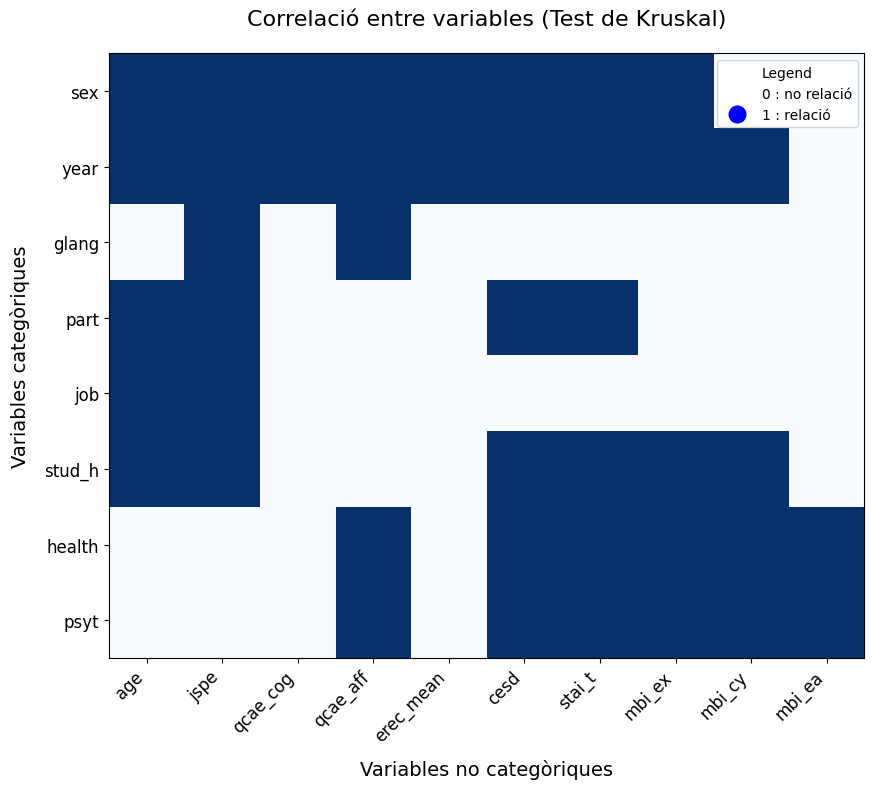

In [39]:
from scipy.stats import kruskal

df_t = df.copy()
M = np.zeros(shape=(len(vars_categoriques), len(vars_num)))
for i, Vcat in enumerate(vars_categoriques):
    groups = [[group[var].values for _, group in df_t.groupby(Vcat)] for var in vars_num]
    # print("Evaluant:", Vcat)
    for j, g in enumerate(groups):
        f_stat, p_value = kruskal(*g)
        # print(f"{vars_num[j]} : Kruskal F-statistic: {f_stat}, p-value: {p_value}")
        M[i][j] = p_value < 0.05


plt.figure(figsize=(10, 8))
plt.imshow(M, cmap='Blues', interpolation='none')

plt.xticks(np.arange(len(vars_num)), vars_num, rotation=45, ha='right', fontsize=12)
plt.yticks(np.arange(len(vars_categoriques)), vars_categoriques, fontsize=12)

plt.xlabel("Variables no categòriques", fontsize=14, labelpad=10)
plt.ylabel("Variables categòriques", fontsize=14, labelpad=10)
plt.title("Correlació entre variables (Test de Kruskal)", fontsize=16, pad=20)

legend_handles = [
    plt.Line2D([0], [0], marker='o', color='white', markerfacecolor='white', markersize=12, linestyle='None', label='0 : no relació'),
    plt.Line2D([0], [0], marker='o', color='blue', markerfacecolor='blue', markersize=12, linestyle='None', label='1 : relació')
]


plt.legend(handles=legend_handles, loc='upper right', title='Legend')
plt.tight_layout()
plt.show()